In [4]:
# 🌲🏠 Random Forest Example: Predicting House Prices
# This script uses a synthetic dataset to train a Random Forest model to predict house prices.

# ---------------------------------------------------------
# 📦 Importing libraries (external tools to help us)
# ---------------------------------------------------------

# Numerical operations (e.g., arrays, math)
import numpy as np  

# Data manipulation & tabular structures (like Excel sheets)
import pandas as pd  

# Plotting graphs and visuals 📈
import matplotlib.pyplot as plt  

# Tools for splitting data and measuring model performance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# This is a custom-made class for our Random Forest model (imported from a separate file)
from random_forest import RandomForestModel  

In [5]:
# ---------------------------------------------------------
# 🏗️ Step 1: Generate synthetic data (fake but realistic data)
# ---------------------------------------------------------

# Ensure that we get the same "random" numbers every time the script runs
np.random.seed(42)  

# Total number of fake houses
n_samples = 100  

# 🏡 House features — each one is a numpy array with shape (100, 1)
square_feet = np.random.randint(500, 3500, size=(n_samples, 1))  # Square footage: 500 - 3500
bedrooms = np.random.randint(1, 6, size=(n_samples, 1))          # Bedrooms: 1 - 5
bathrooms = np.random.randint(1, 5, size=(n_samples, 1))         # Bathrooms: 1 - 4
age = np.random.randint(0, 51, size=(n_samples, 1))              # Age of house: 0 - 50 years

# 📦 Stack all feature arrays side by side into one matrix (X has shape 100x4)
X = np.hstack([square_feet, bedrooms, bathrooms, age])

# 🧮 Generate target variable y (house price) based on a linear equation + noise
true_weights = np.array([150, 10000, 7000, -500]).reshape(-1, 1)  # Feature importance
# Dot product: X ⋅ weights = base price
price = X.dot(true_weights)  
# Add noise to make it more realistic (like real-world variation)
noise = np.random.normal(0, 10000, size=price.shape)  
y = price + noise  # Final target values (with noise)



In [6]:
# ---------------------------------------------------------
# ✂️ Step 2: Split the data into training and testing sets
# ---------------------------------------------------------

# 80% for training, 20% for testing (random_state = reproducibility)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# ---------------------------------------------------------
# 🧠 Step 3: Train the Random Forest model
# ---------------------------------------------------------

# Instantiate (create) our model
model = RandomForestModel()

# Train it on our training data
# Note: y_train.ravel() flattens the array from (80,1) to (80,)
# This is needed because sklearn expects 1D target arrays
model.train(X_train, y_train.ravel())

In [8]:
# ---------------------------------------------------------
# 🔮 Step 4: Make predictions on the test data
# ---------------------------------------------------------

# Predict the house prices for our 20 test examples
y_pred = model.predict(X_test)

In [9]:
# ---------------------------------------------------------
# 🧮 Step 5: Evaluate model performance
# ---------------------------------------------------------

# Mean Squared Error: average squared difference between predicted and actual prices
mse = mean_squared_error(y_test, y_pred)

# R² Score: how well the predictions match the actual values (1.0 is perfect)
r2 = r2_score(y_test, y_pred)

# Show the results
print(f"🧮 Mean Squared Error: {mse:,.2f}")
print(f"✅ R² Score: {r2:.3f}")

🧮 Mean Squared Error: 290,249,026.13
✅ R² Score: 0.981


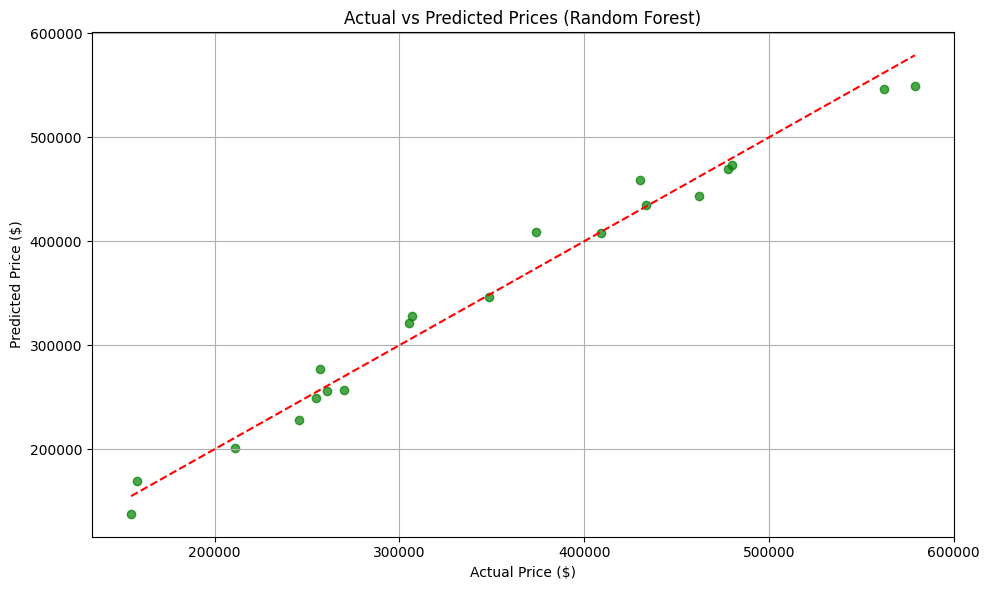

In [10]:
# ---------------------------------------------------------
# 📊 Step 6: Visualize predictions vs actual values
# ---------------------------------------------------------

plt.figure(figsize=(10, 6))  # Set plot size

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred, color="green", alpha=0.7)

# Draw a red dashed line for perfect predictions (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")

# Add labels and title
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()